In [67]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import matplotlib
import numpy as np
import seaborn as sns

In [68]:
eco = pd.read_csv('T_SetCost_50-10_PhvacCost_01.csv', index_col=0)
eco.index = pd.to_datetime(eco.index, format='%Y-%m-%d %H:%M:%S')

In [69]:
#vreg = pd.read_csv('Voltage_Regulation_20min_26-22-2020_7am_7pm.csv', index_col=0)
vreg = pd.read_csv('Voltage_Regulation_20min_26-22-2020_7am_6pm.csv', index_col=0)
vreg.index = pd.to_datetime(vreg.index, format='%Y-%m-%d %H:%M:%S')

In [121]:
dt = 1/3

In [85]:
def plot_electrical3(df_results, sim):
    
    sns.set(font_scale=1.35, rc={'figure.figsize':(12,5)})
    sns.set_style("darkgrid", {"axes.facecolor": ".9"})
    matplotlib.rcParams['font.family'] = 'Abyssinica SIL'
    
    
    fig = plt.figure(figsize=(12,8))
    
    gs=GridSpec(3,1) # 2 rows, 3 columns

    ax1=fig.add_subplot(gs[0,0]) # First row, first column
    ax2=fig.add_subplot(gs[1:,0]) # First row, second column

    
    load =  ax2.plot(df_results.index, df_results['load'], label='$p_i^l$', lw=1, color='red', ls=(0, (3, 1, 1, 1)))
    pv =  ax2.plot(df_results.index, df_results['pv'], label='$p_i^p$', lw=1, color='blue', ls=(0, (5, 5)))
    im =  ax2.plot(df_results.index, df_results['p_im'], label='$p_i^i$', lw=1, color='grey', ls='-.')
    ex =  ax2.plot(df_results.index, df_results['p_ex'], label='$p_i^e$', lw=1, color='orange', ls=(0, (3, 1, 1, 1, 1, 1)))
    ch =  ax2.plot(df_results.index, df_results['p_ch'], label='$p_i^c$', lw=1.5,color='black', ls='dotted')
    dis =  ax2.plot(df_results.index, df_results['p_dis'], label='$p_i^d$', lw=1, color='green')
    hvac = ax2.plot(df_results.index, df_results['p_hvac'], label='$p_i^h$', lw=1, color='purple', ls=(0, (5, 1)))
    ax2.set_ylim(-7000,12000)
     
    soc = ax1.plot(df_results.index, df_results['soc'], label='$SoC$', lw=1, color='blue', ls='--')
    ax1.set_ylim(-10,120)
    
    ax3 = ax1.twinx()
    ax3.set_ylabel('Cost ($/kWh)')
    ax3.set_ylim(0,0.4)
    tou = ax3.plot(df_results.index, df_results['tou'], label='$ToU$', lw=1, color='red',)
    ax3.grid()
    
    ax2.set_xlabel('Date')
    ax1.set_ylabel('SoC (%)')
    ax1.get_shared_x_axes().join(ax1, ax2)
    ax1.set_xticklabels([])
    ax2.set_ylabel('Power (W)')
    
    ax2.legend(loc="upper left", ncol=7)
    ax1.legend(loc="upper left")
    ax3.legend(loc="upper right")
    ax1.autoscale(enable=True, axis='x', tight=True)
    
    plt.savefig(f'{sim}_26-11-2020_electrical.pdf')

In [117]:
def plot_thermal_combined2(mpc_data, rbc_data):
    
    sns.set(font_scale=1.35, rc={'figure.figsize':(12,5)})
    sns.set_style("darkgrid", {"axes.facecolor": ".9"})
    matplotlib.rcParams['font.family'] = 'Abyssinica SIL'
    
    fig, ax = plt.subplots(2, sharex=True)
    ax[0].set_ylabel('Temperature ($^\circ$C)')
    ax[0].set_ylim(15,35)
    ax[0].set_xlim(mpc_data.index[0],mpc_data.index[-1])
    ax[0].plot(mpc_data.index, mpc_data['T_i'], color='red', lw=2, ls='--')
    ax[0].plot(mpc_data.index, rbc_data['T_i'], color='black', lw=2, ls=(0, (3, 1, 1, 1, 1, 1)))
    ax[0].plot(mpc_data.index, mpc_data['t_ext'], color='green', ls='-.')
    #ax[0].plot(mpc_data.index, mpc_data['t_bed'])
    ax[0].plot(mpc_data.index, mpc_data['set_point'], color='grey')
    ax[0].legend(['Volt Reg MPC $T_i^i$', 'Eco MPC $T_i^i$', '$T_a$', 'Set Point'], loc="upper left", ncol=4)
    
    
    
    #Plot Results
    
    ax[1].set_xlabel('Date')
    ax[1].set_ylabel('Cooling (kW) \n Solar Irradiance (kW/m$^2$)')
    ax[1].set_ylim(0,10)
    #ax1.plot(df_results.index, df_results['phi_h_heat'], color='red')
    ax[1].plot(mpc_data.index, -mpc_data['phi_h_cool'], color='red', alpha=0.75, )
    ax[1].plot(mpc_data.index, -rbc_data['phi_h_cool'], color= 'black', ls=(0, (3, 1, 1, 1, 1, 1)))
    ax[1].plot(mpc_data.index, mpc_data['ghi']/1000, color='blue', ls='--')
    ax[1].legend(['Volt Reg MPC $\Phi_i^c$', 'Eco MPC $\Phi_i^c$', 'GHI'], loc="upper left", ncol=1)



    fig.tight_layout()
    fig.set_figheight(7.5)
    fig.set_figwidth(12)# otherwise the right y-label is slightly clipped
    #ax.grid()
    
    plt.savefig('voltage_reg_thermal_comfort.pdf')
    ax[0].autoscale(enable=True, axis='x', tight=True)
    ax[1].autoscale(enable=True, axis='x', tight=True)
    plt.show()

In [122]:
def mpc_energy_df(mpc_results):
    mpc_energy = mpc_results['2020-11-23':'2020-11-29'][['p_load', 'pv', 'p_hvac', 'p_im', 'p_ex', 'p_ch', 'p_dis', 
                      'cost', 'payment']].resample('d').sum()
    
    mpc_energy[['p_load', 'pv', 'p_im', 'p_ex', 'p_ch', 'p_dis','p_hvac']] = (mpc_energy[['p_load', 'pv', 'p_im', 'p_ex', 'p_ch', 'p_dis','p_hvac']])/(1000)*dt
    
    mpc_energy.loc['Total'] = mpc_energy.sum()
    
    #print(mpc_energy)
    
    return mpc_energy

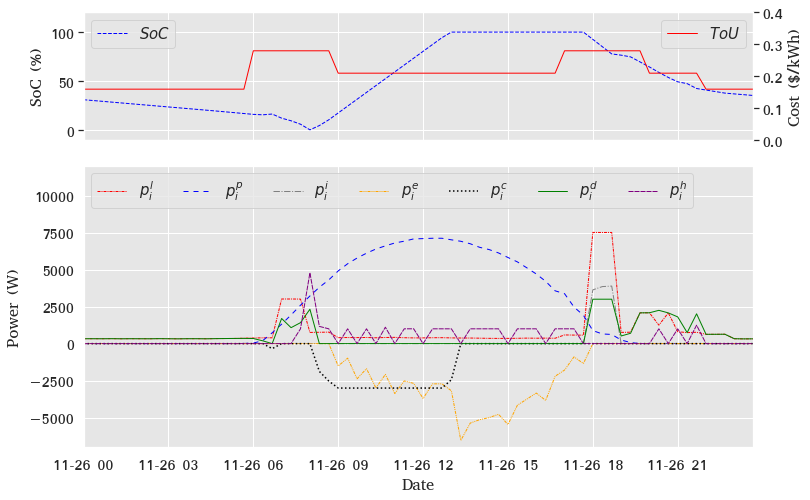

In [93]:
plot_electrical3(eco['2020-11-26'], 'eco_mode')

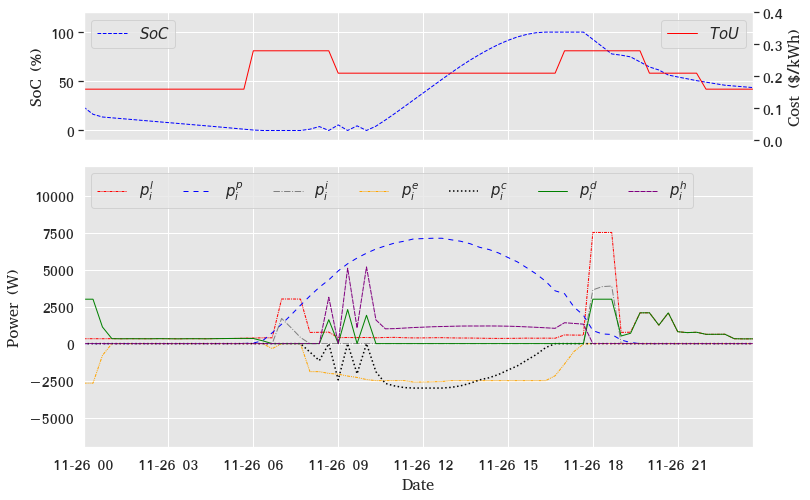

In [94]:
plot_electrical3(vreg['2020-11-26'], 'vreg_mode')

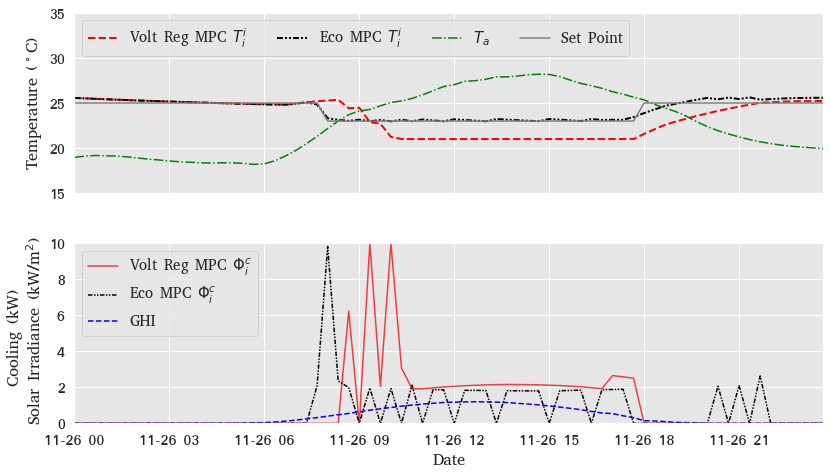

In [118]:
plot_thermal_combined2(vreg['2020-11-26'], eco['2020-11-26'])

In [90]:
eco.loc['2020-11-26']['p_ex'].min()

-6532.0

In [91]:
vreg.loc['2020-11-26']['p_ex'].min()

-2669.5

In [125]:
eco_energy = mpc_energy_df(eco.loc['2020-11-26'])
eco_energy

,p_load,pv,p_hvac,p_im,p_ex,p_ch,p_dis,cost,payment
2020-11-26 00:00:00,31.849214,58.078089,9.76787,3.789667,-28.69208,-14.392859,13.066397,1.061107,-3.156129
Total,31.849214,58.078089,9.76787,3.789667,-28.69208,-14.392859,13.066397,1.061107,-3.156129


In [126]:
vreg_energy = mpc_energy_df(vreg.loc['2020-11-26'])
vreg_energy

,p_load,pv,p_hvac,p_im,p_ex,p_ch,p_dis,cost,payment
2020-11-26 00:00:00,35.914212,58.078089,13.832867,4.853,-24.377387,-16.442018,13.802527,1.35884,-2.681513
Total,35.914212,58.078089,13.832867,4.853,-24.377387,-16.442018,13.802527,1.35884,-2.681513


In [127]:
eco_energy.round(2).to_latex()

'\\begin{tabular}{lrrrrrrrrr}\n\\toprule\n{} &  p\\_load &     pv &  p\\_hvac &  p\\_im &   p\\_ex &   p\\_ch &  p\\_dis &  cost &  payment \\\\\n\\midrule\n2020-11-26 00:00:00 &   31.85 &  58.08 &    9.77 &  3.79 & -28.69 & -14.39 &  13.07 &  1.06 &    -3.16 \\\\\nTotal               &   31.85 &  58.08 &    9.77 &  3.79 & -28.69 & -14.39 &  13.07 &  1.06 &    -3.16 \\\\\n\\bottomrule\n\\end{tabular}\n'

In [128]:
vreg_energy.round(2).to_latex()

'\\begin{tabular}{lrrrrrrrrr}\n\\toprule\n{} &  p\\_load &     pv &  p\\_hvac &  p\\_im &   p\\_ex &   p\\_ch &  p\\_dis &  cost &  payment \\\\\n\\midrule\n2020-11-26 00:00:00 &   35.91 &  58.08 &   13.83 &  4.85 & -24.38 & -16.44 &   13.8 &  1.36 &    -2.68 \\\\\nTotal               &   35.91 &  58.08 &   13.83 &  4.85 & -24.38 & -16.44 &   13.8 &  1.36 &    -2.68 \\\\\n\\bottomrule\n\\end{tabular}\n'

<AxesSubplot:>

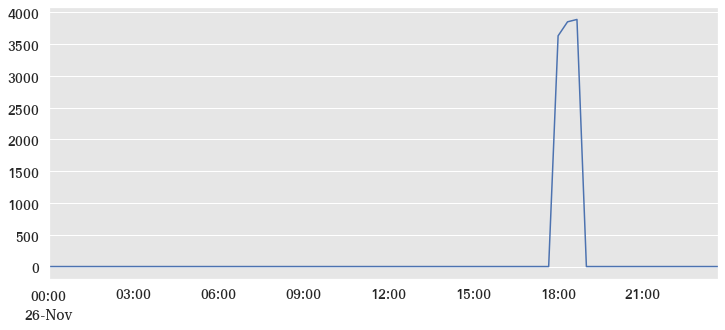

In [129]:
eco.loc['2020-11-26']['p_im'].plot()

<AxesSubplot:>

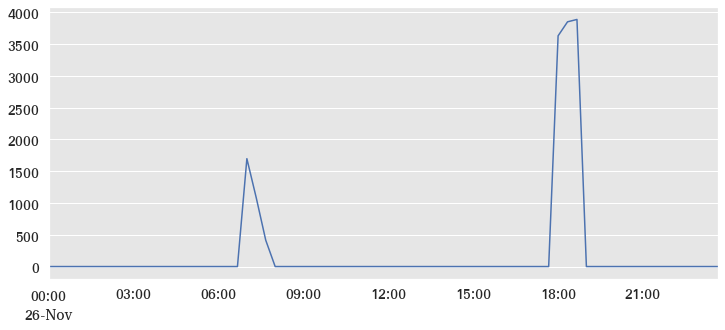

In [130]:
vreg.loc['2020-11-26']['p_im'].plot()